[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



An example of a categorical variable is color, such as green or red.
An example of a quantitative variable is someone's age in terms of units, such as being 22 years old.
An example of a discrete variable is the sex of someone, such as whether they are male or female.
An example of a continous variable is time.

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

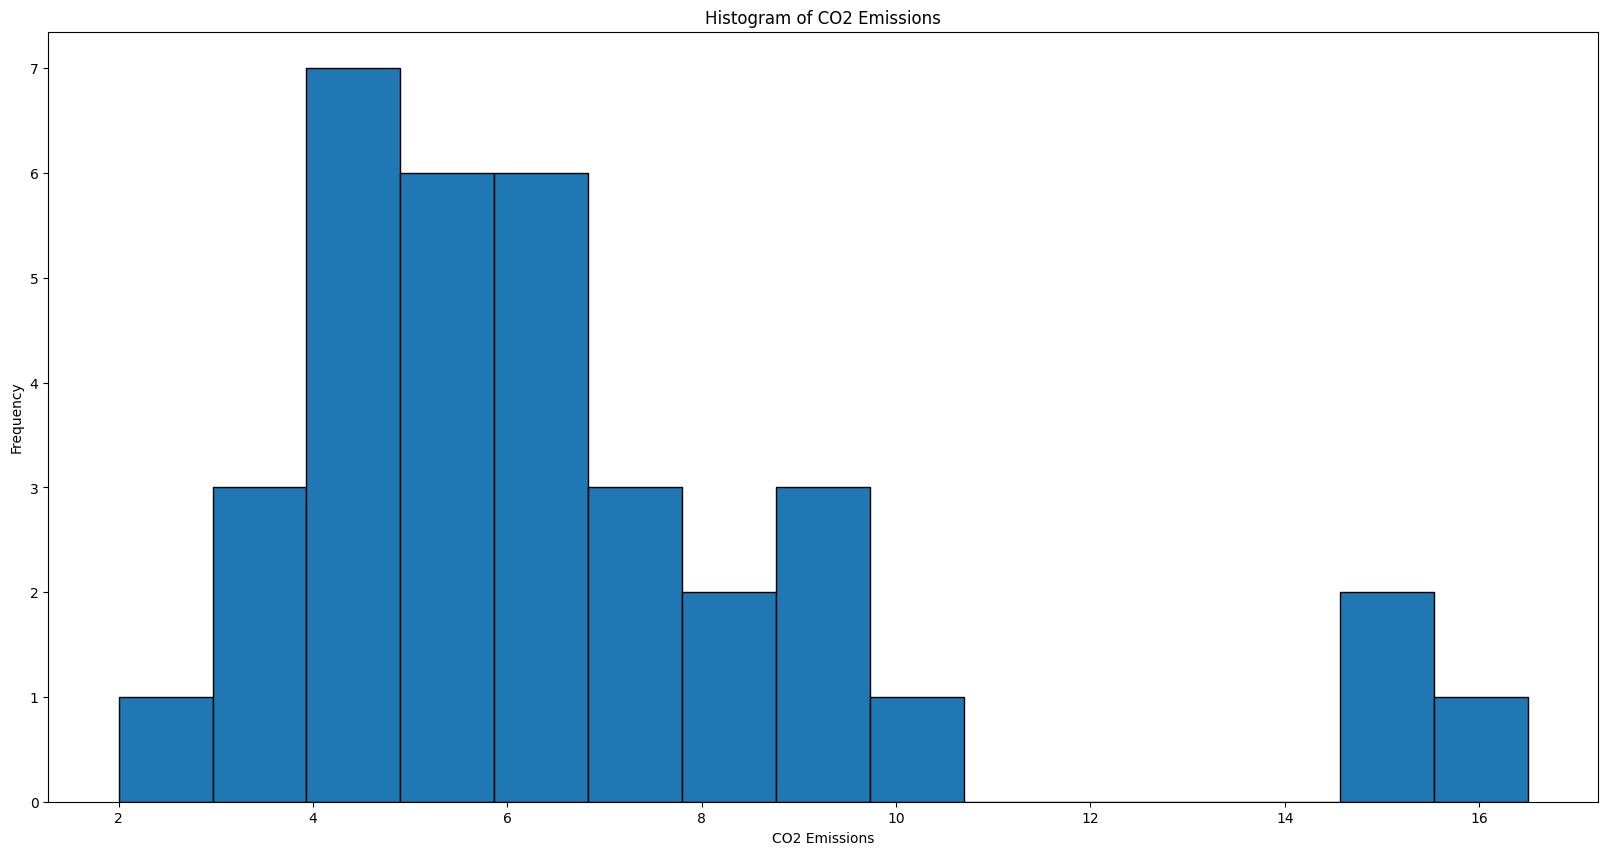

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(carbon_west['CO2'], bins=15, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [20]:
# Calculate mean, median, and standard deviation
mean_value = np.mean(carbon_west['CO2'])
median_value = np.median(carbon_west['CO2'])
std_deviation = np.std(carbon_west['CO2'])
variance = np.var(carbon_west['CO2'])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727
Variance: 10.94713469387755


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [24]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [26]:
# Calculate mean, median, and standard deviation
mean_value_murder = np.mean(murders['murder'][:-1])
median_value_murder = np.median(murders['murder'][:-1])
std_deviation_murder = np.std(murders['murder'][:-1])
variance_murder = np.var(murders['murder'][:-1])

# Display the results
print(f"Mean: {mean_value_murder}")
print(f"Median: {median_value_murder}")
print(f"Standard Deviation: {std_deviation_murder}")
print(f"Variance: {variance_murder}")

Mean: 4.874
Median: 4.85
Standard Deviation: 2.560297638947472
Variance: 6.555123999999999


Part b. Find the five-number  summary without D.C.

In [27]:
# Calculate the five-number summary
minimum = np.min(murders['murder'][:-1])
q1 = np.percentile(murders['murder'][:-1], 25)
median = np.median(murders['murder'][:-1])
q3 = np.percentile(murders['murder'][:-1], 75)
maximum = np.max(murders['murder'][:-1])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [29]:
#Mean and Median
mean_value_murder_withDC = np.mean(murders['murder'])
median_value_murder_withDC = np.median(murders['murder'])

#5 Number Summary
minimum_withDC = np.min(murders['murder'])
q1_withDC = np.percentile(murders['murder'], 25)
median_withDC = np.median(murders['murder'])
q3_withDC = np.percentile(murders['murder'], 75)
maximum_withDC = np.max(murders['murder'])

# Display the results
print(f"Mean: {mean_value_murder_withDC}")
print(f"Median: {median_value_murder_withDC}")
print(f"Minimum: {minimum_withDC}")
print(f"1st Quartile (Q1): {q1_withDC}")
print(f"Median (Q2): {median_withDC}")
print(f"3rd Quartile (Q3): {q3_withDC}")
print(f"Maximum: {maximum_withDC}")

Mean: 5.252941176470588
Median: 5.0
Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2


The Mean was affected more than the median because it went up by approximately 0.38 while the median only increased by 0.15.
The range was definitely more affected than the interquartile range with the inclusion of DC. The range doubled while the interquartile range only went up by 0.25 murders.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [30]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

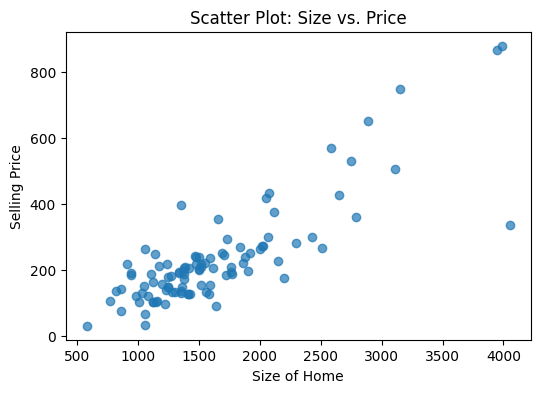

In [35]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size of Home')
plt.ylabel('Selling Price')

plt.show()

Part b. Find the correlation between the two variables.

In [36]:
# Calculate the correlation between "size" and "price"
correlation = houses['size'].corr(houses['price'])

print(f'Correlation between Size and Price: {correlation}')

Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Slope (Coefficient): 0.18989116794379637
Intercept: -76.3893821074686


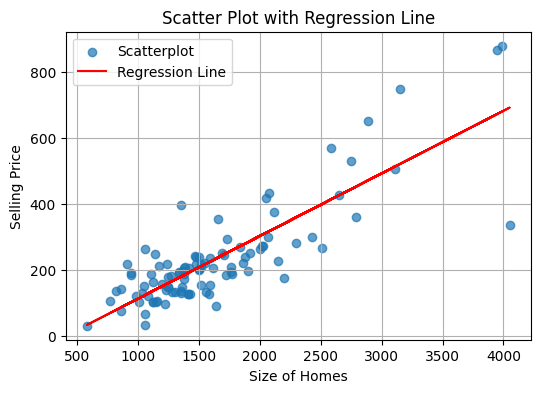

In [40]:
x = houses[['size']]
y = houses['price']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression results
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')


# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size of Homes')
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

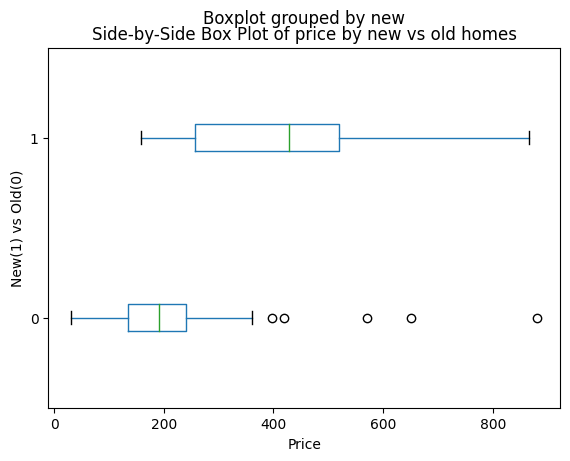

In [43]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of price by new vs old homes')
plt.xlabel('Price')
plt.ylabel('New(1) vs Old(0)')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

On average as the size of the house increases there is also an increase to the price of the house. The plots above show this with the clusters of dots generally forming along the line of best fit which has a slope of about 0.19. This is a positive slope indicating a postivie relationship between the 2. So as 1 increases the other increases as well.
Then in general the newer houses have a higher price compared to the older ones which is what the boxplots above show. Even though the old homes have a higher maximum price the boxplot shows the 5 highest prices of older homes to be outliers. In fact a little over 75% of new homes cost more than 75% of old homes. So in general newer homes are more likely to cost more.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [44]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [48]:
pd.crosstab(happy["marital"],happy["happiness"], normalize = "index")

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,0.304462,0.000000,0.000000,0.00000,0.56168,0.000000,0.000000,0.000000,0.133858,0.000000,0.000000,0.000000
fem,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mal,0.000000,0.119553,0.036872,0.06257,0.00000,0.255866,0.127374,0.234637,0.000000,0.036872,0.050279,0.075978
male,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
